In [1]:

#IMPORTING NECESSARY LIBRARIES

import pandas as pd

import json

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import os



In [2]:
# Specifying path to the xlsx file
xlsx_file_path = '/content/HospitalPatientsData_Heart Disease Prediction.xlsx'

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(xlsx_file_path)



In [3]:
#Making a copy of data into df
df  = data.copy()

In [4]:
#Data inspection
df.head()
print("Shape is", df.shape)

Shape is (237630, 35)


In [5]:
#Data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [6]:
#Columns inspection for data types
df.dtypes

,0
PatientID,int64
State,object
Sex,object
GeneralHealth,object
AgeCategory,object
HeightInMeters,float64
WeightInKilograms,float64
BMI,float64
HadHeartAttack,int64
HadAngina,int64


# IDENTIFYING CATEGORICAL AND NUMERIC FEATURES
Using domain knowledge and inspection we see that with the exeption of PatientID, all the  int64 data types are actually boolean(true/false) and not numeric.
We aslo see immediately that PatientID is not relevant.
We can drop the PatientID early in this scenario so it does not inconvenience us all the way

In [7]:
#Dropping the PatientID early because it is not needed and so it does not inconvenience us all the way
df.drop(['PatientID'], axis=1, inplace=True)

In [8]:
# Initialize lists for categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Classify columns
for column in df.columns:
    if df[column].dtypes == 'object' or df[column].dtypes == 'bool' or df[column].dtypes == 'int64':
        categorical_columns.append(column)
    elif df[column].dtypes == 'float64':
        numerical_columns.append(column)

# Display results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['State', 'Sex', 'GeneralHealth', 'AgeCategory', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Numerical Columns: ['HeightInMeters', 'WeightInKilograms', 'BMI']


In [9]:
#Statistical examination of relevant features
df[numerical_columns].describe()

,HeightInMeters,WeightInKilograms,BMI
count,237630.000000,237630.000000,237630.000000
mean,1.704990,83.667908,28.691602
std,0.106776,21.360982,6.528065
min,0.910000,28.120001,12.020000
25%,1.630000,68.040001,24.280001
50%,1.700000,81.650002,27.459999
75%,1.780000,95.250000,31.900000
max,2.410000,292.570007,97.650002


In [10]:
#To determine ordinal and norminal features using unique values and domain knowledge
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


State: 54 unique values
Sex: 2 unique values
GeneralHealth: 5 unique values
AgeCategory: 13 unique values
HeightInMeters: 101 unique values
WeightInKilograms: 513 unique values
BMI: 3503 unique values
HadHeartAttack: 2 unique values
HadAngina: 2 unique values
HadStroke: 2 unique values
HadAsthma: 2 unique values
HadSkinCancer: 2 unique values
HadCOPD: 2 unique values
HadDepressiveDisorder: 2 unique values
HadKidneyDisease: 2 unique values
HadArthritis: 2 unique values
HadDiabetes: 4 unique values
DeafOrHardOfHearing: 2 unique values
BlindOrVisionDifficulty: 2 unique values
DifficultyConcentrating: 2 unique values
DifficultyWalking: 2 unique values
DifficultyDressingBathing: 2 unique values
DifficultyErrands: 2 unique values
SmokerStatus: 4 unique values
ECigaretteUsage: 4 unique values
ChestScan: 2 unique values
RaceEthnicityCategory: 5 unique values
AlcoholDrinkers: 2 unique values
HIVTesting: 2 unique values
FluVaxLast12: 2 unique values
PneumoVaxEver: 2 unique values
TetanusLast10Td

<Axes: >

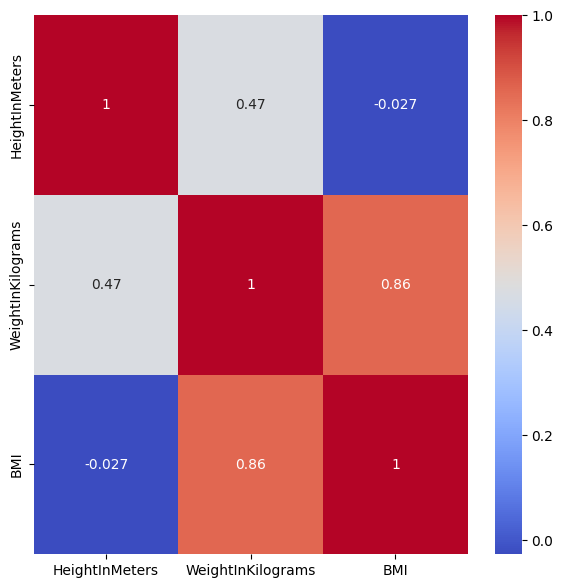

In [11]:
# Examine correlation on numerical featurs
corr = df[numerical_columns].corr()

plt.figure(figsize=(7,7))#Image size

sns.heatmap(corr, annot=True, cmap='coolwarm')


In [12]:
#To look for features with high correlation above 0.7
threshold = 0.7

high_corr_pairs = [(col1, col2) for col1 in corr.columns for col2 in corr.columns if col1 != col2 and abs(corr.loc[col1, col2]) > threshold]

high_corr_columns = set([col for pair in high_corr_pairs for col in pair])


#Making the output into a list
low_corr_pairs = [(col1, col2) for col1 in corr.columns for col2 in corr.columns if col1 != col2 and abs(corr.loc[col1, col2]) < threshold]

low_corr_columns = set([col for pair in low_corr_pairs for col in pair])


print("Columns with high correlation:", list(high_corr_columns))



Columns with high correlation: ['BMI', 'WeightInKilograms']


VISUALIZATION FOR NUMERICAL FEATURES

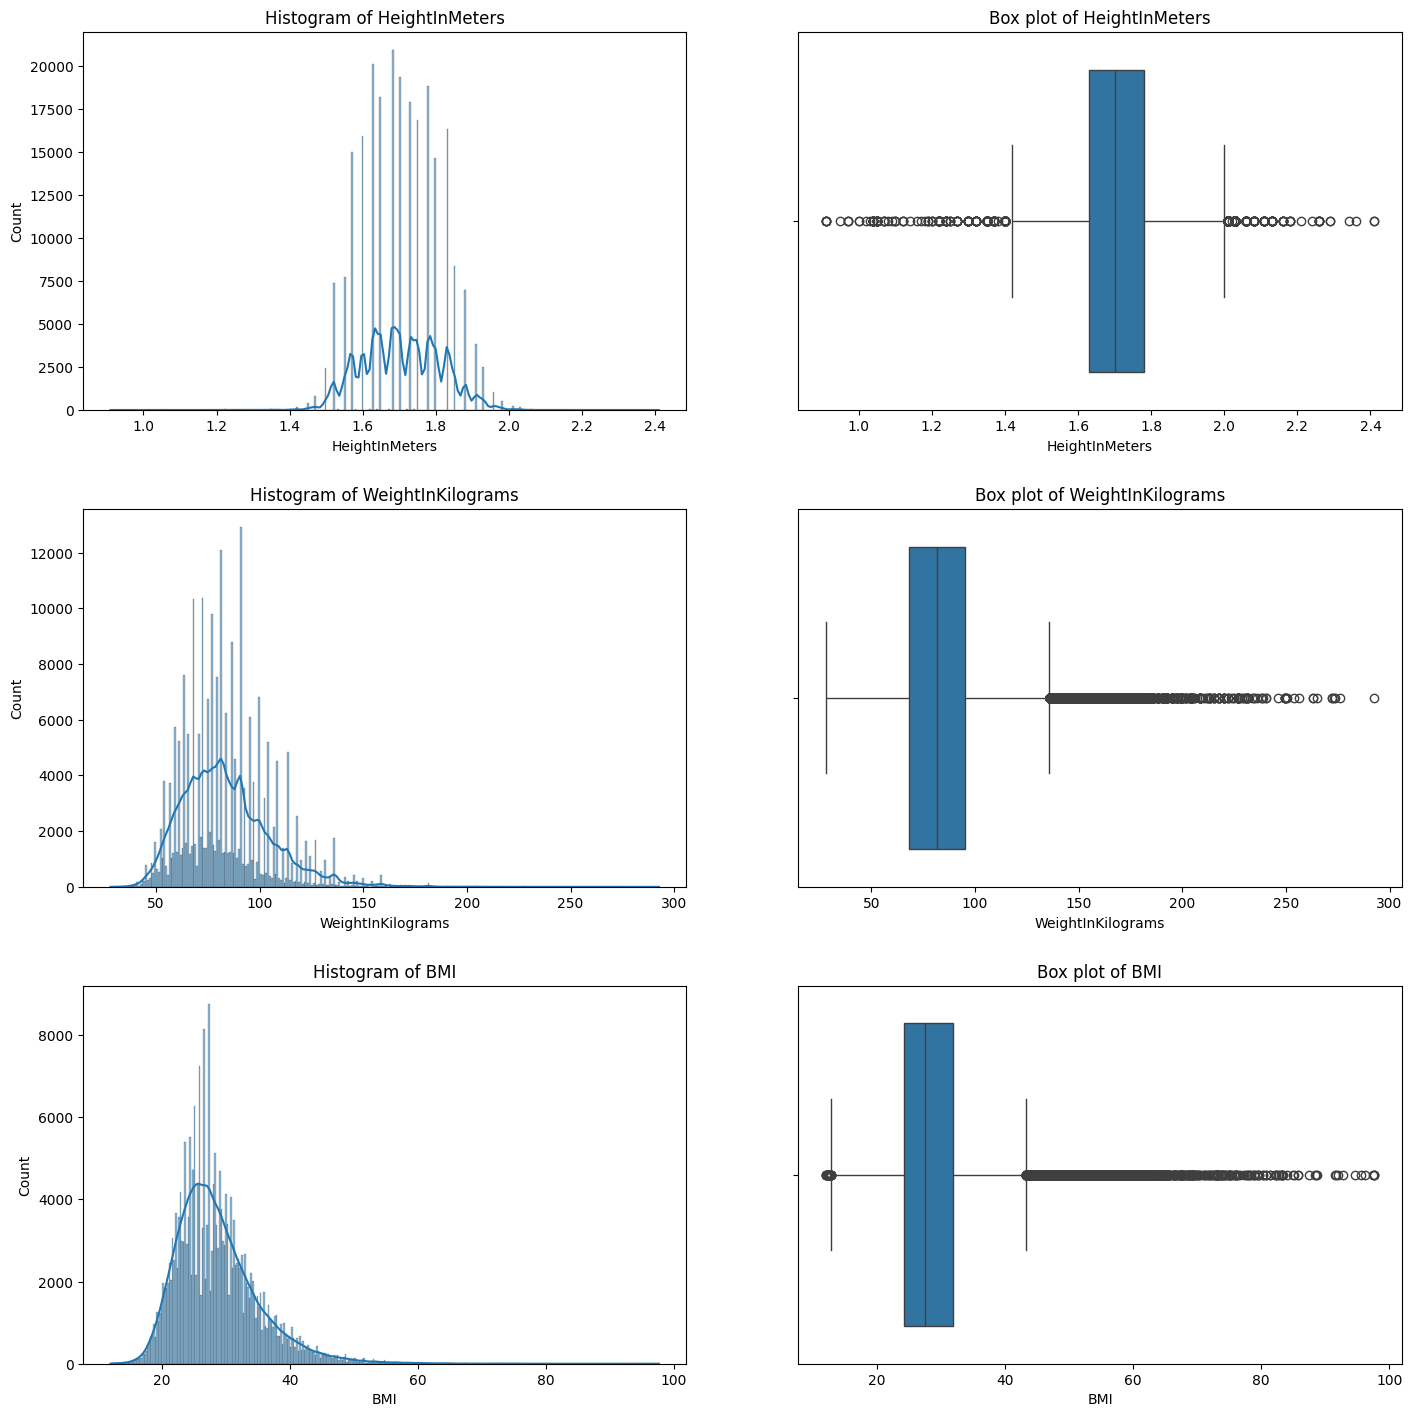

In [13]:
#PLOTTING HISTOGRAM AND BOXPLOT TO UNDERSTAND DISTRIBUTION AND OUTLIERS OF THE NUMERICAL DATA
#numerical_columns = df[numerical_columns]



fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5 * len(numerical_columns)))

fig.tight_layout(pad=5.0)



for i, column in enumerate(numerical_columns):

    # Histogram

    sns.histplot(df[column], kde=True, ax=axes[i, 0])

    axes[i, 0].set_title(f'Histogram of {column}')



    # Box plot

    sns.boxplot(x=df[column], ax=axes[i, 1])

    axes[i, 1].set_title(f'Box plot of {column}')



plt.show()

The no of rows is over 230k, hence the box plot looks a crowded with outliers. Number of outliers is less than 2%

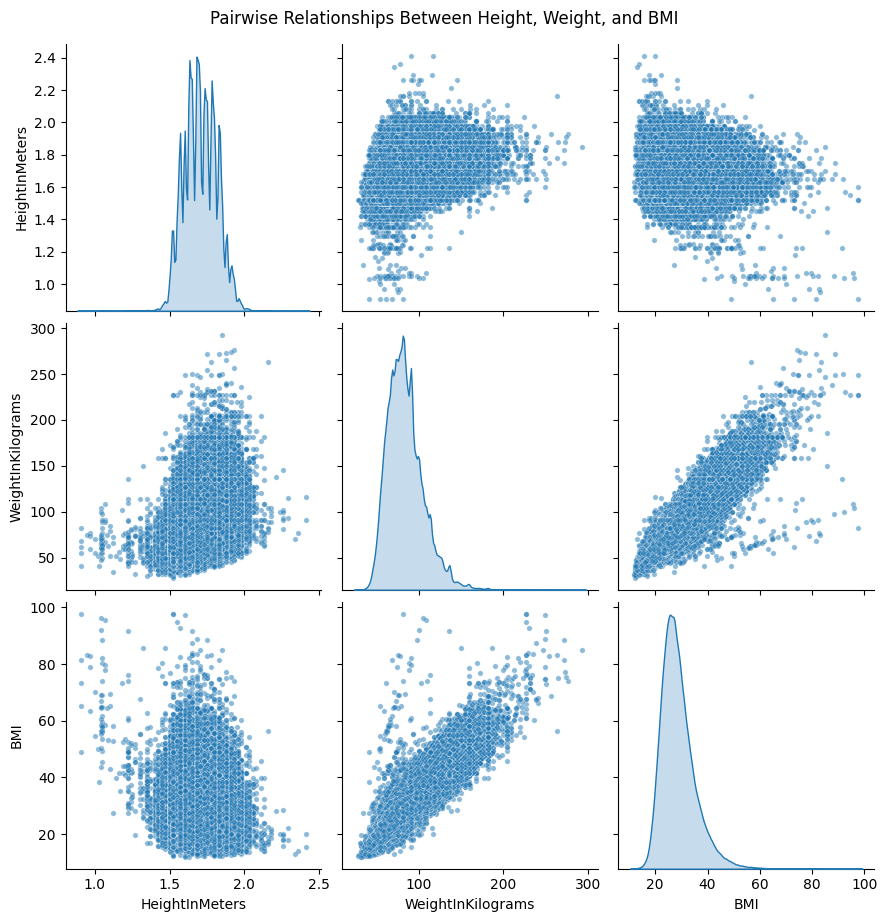

In [14]:
#PLOTTING PAIR PLOT
import seaborn as sns
import pandas as pd

sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 15}, height=3.0)
plt.suptitle("Pairwise Relationships Between Height, Weight, and BMI", y=1.02)
plt.show()


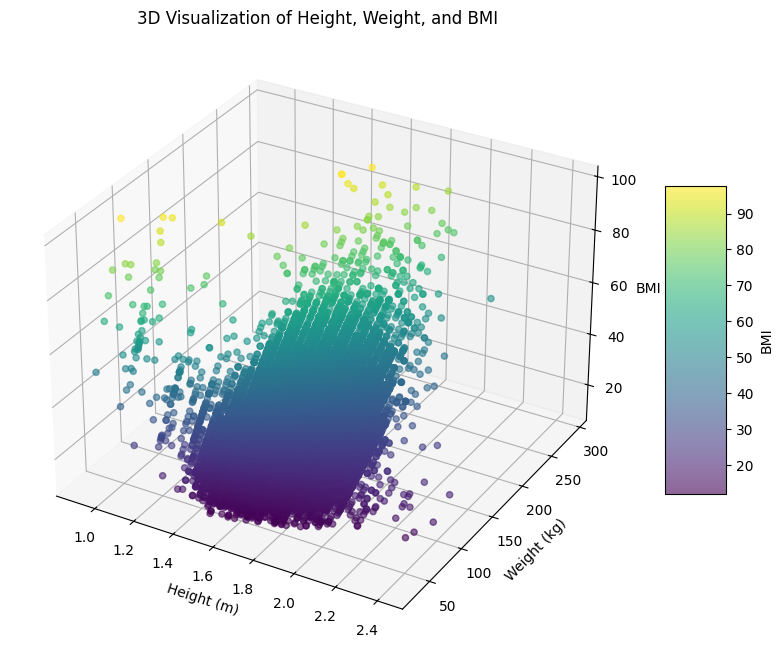

In [15]:
#MAKING A 3D VISUALIZATION OF NUMERICAL FEATURES
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df[numerical_columns] contains the three features: 'HeightInMeters', 'WeightInKilograms', 'BMI'
numerical_columns = ['HeightInMeters', 'WeightInKilograms', 'BMI']

# Extract the features
height = df[numerical_columns]['HeightInMeters']
weight = df[numerical_columns]['WeightInKilograms']
bmi = df[numerical_columns]['BMI']

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with transparency
scatter = ax.scatter(height, weight, bmi, c=bmi, cmap='viridis', marker='o', alpha=0.6)

# Set axis labels
ax.set_xlabel('Height (m)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('BMI')

# Add a color bar to show BMI values
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('BMI')

# Set title
ax.set_title('3D Visualization of Height, Weight, and BMI')

# Show the plot
plt.show()


VISUALIZATION FOR CATEGORICAL FEATURES

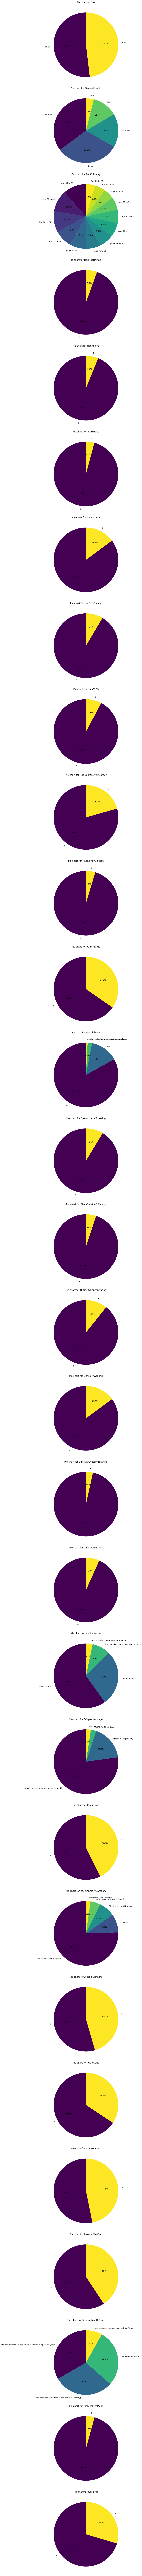

In [16]:
#COMPOSITION
#Selecting categorical features for inspection
# Skiping the first column (State) because it is too large for the  display
categorical_columns_excluding_state = categorical_columns[1:]  # Skip the first column



#Plot a pie chart for the features
fig, axes = plt.subplots(nrows=30, ncols=1, figsize=(10, 190))#defined display rows, columns and size

axes = axes.flatten()


for i, column in enumerate(categorical_columns_excluding_state):

    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[i])

    axes[i].set_title(f'Pie chart for {column}')

    axes[i].set_ylabel('')



plt.tight_layout()

plt.show()

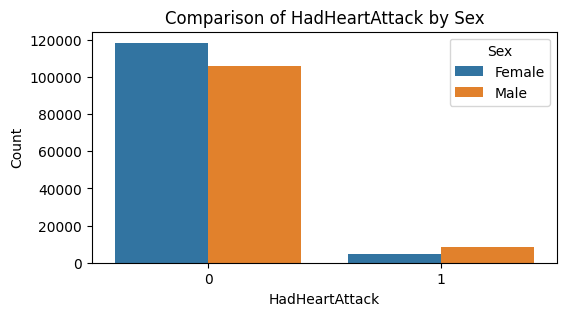

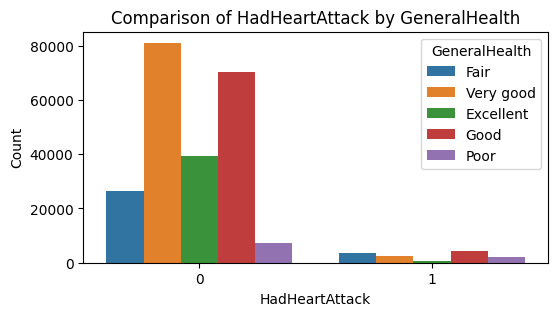

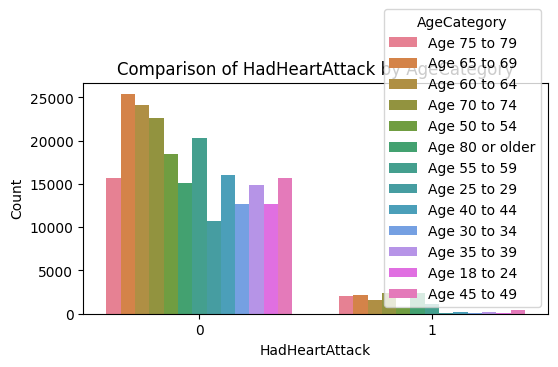

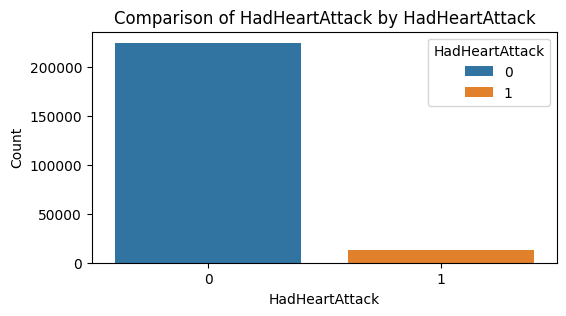

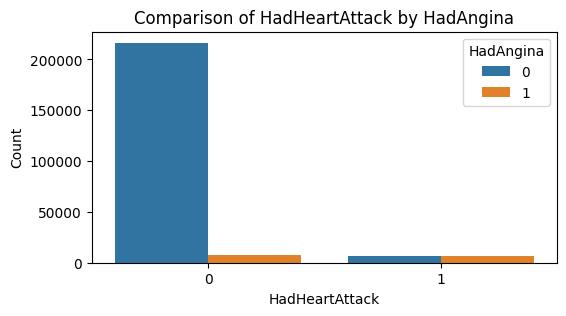

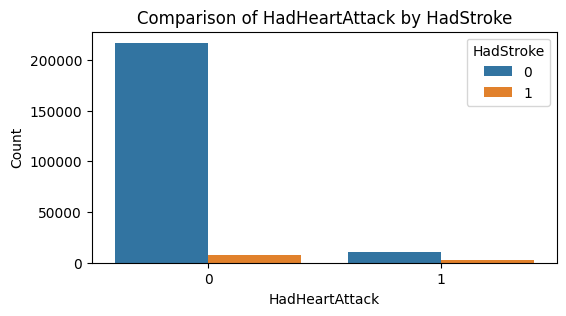

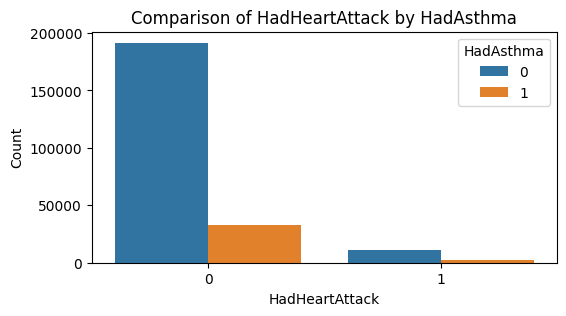

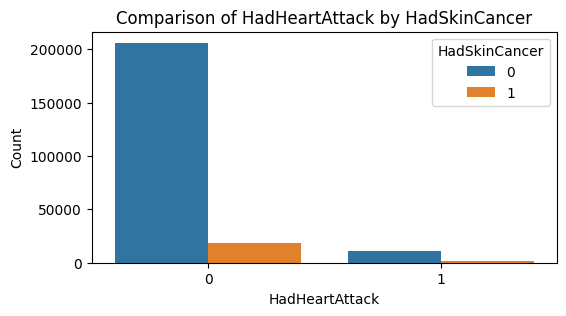

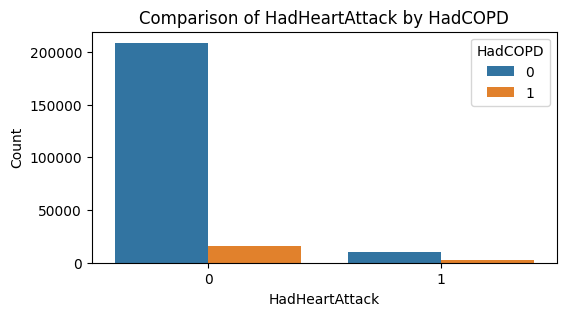

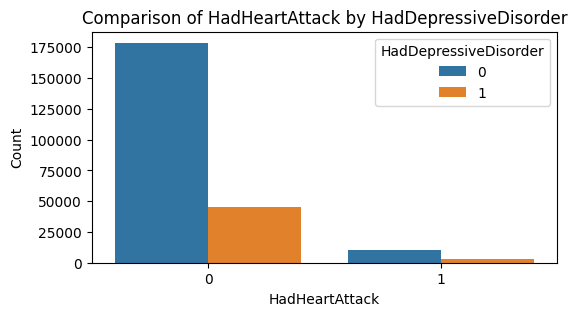

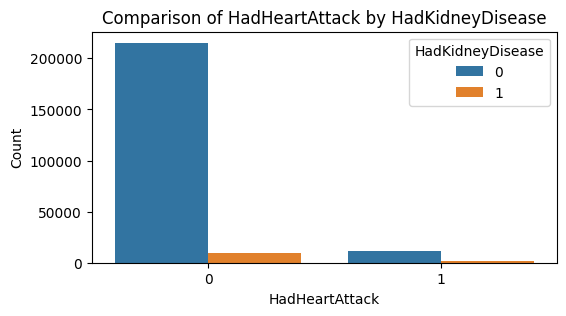

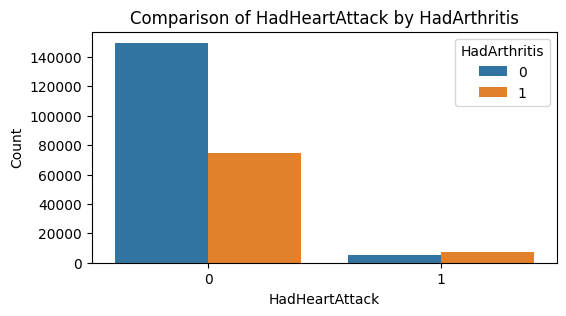

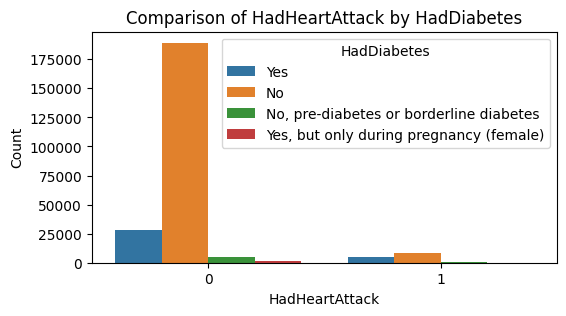

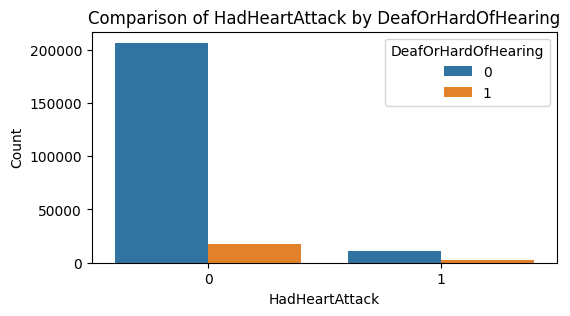

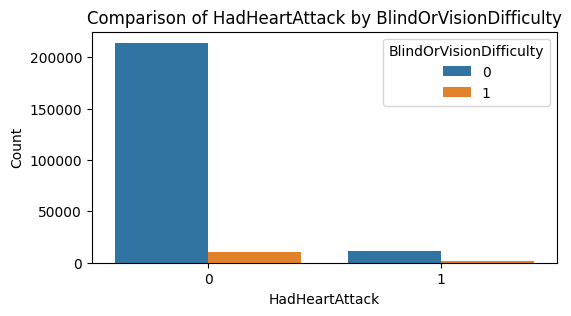

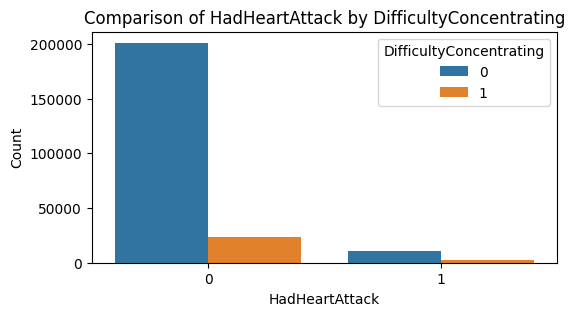

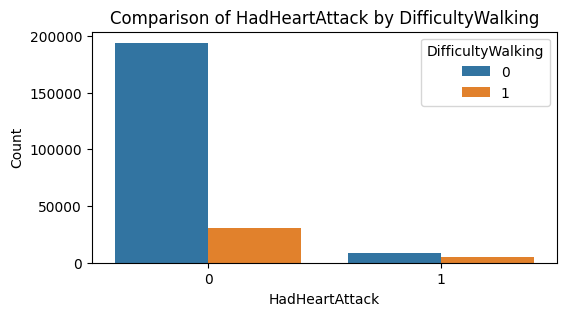

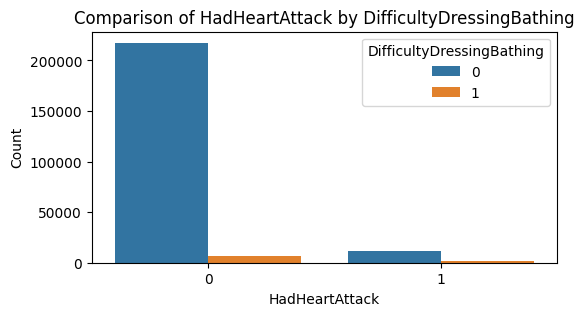

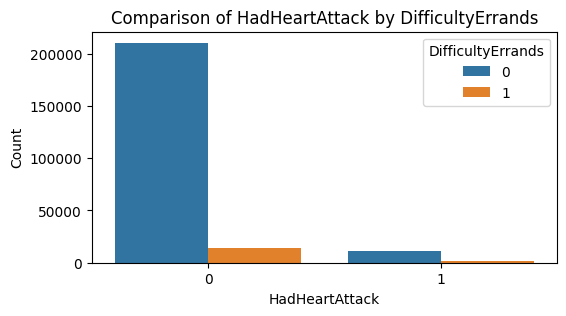

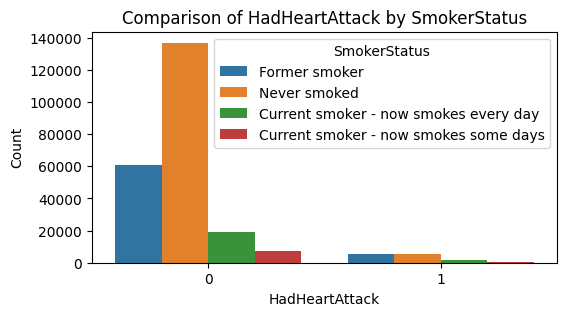

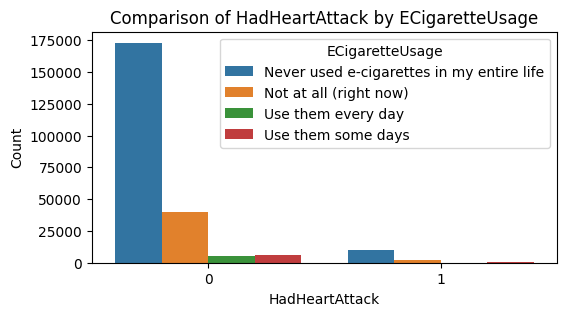

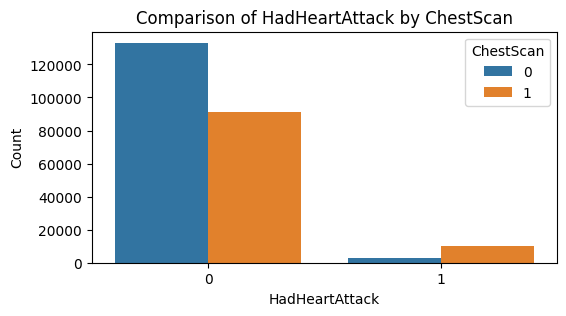

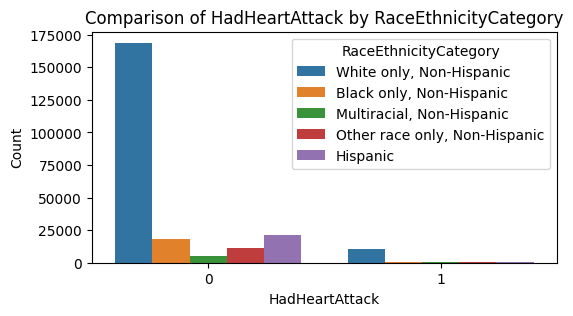

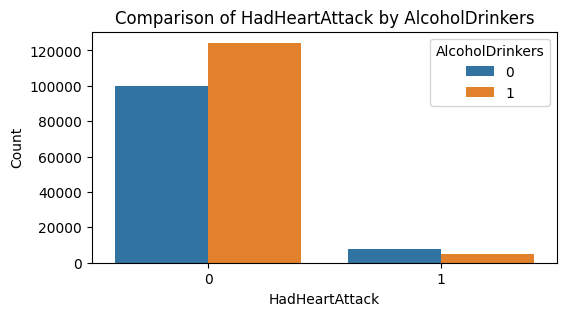

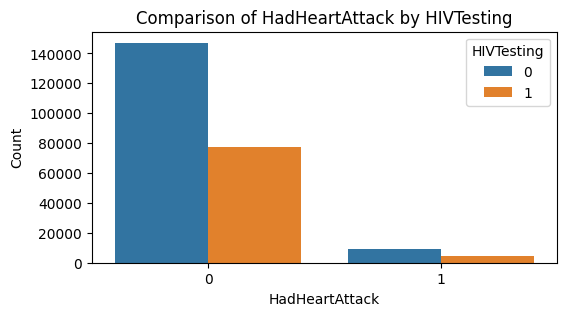

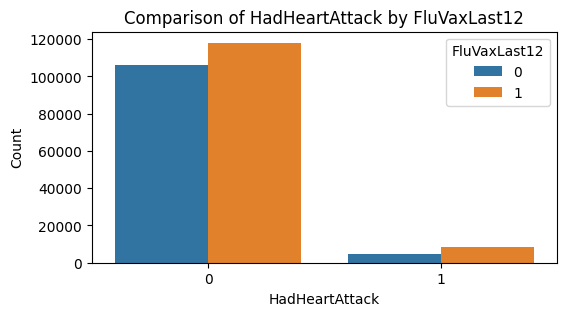

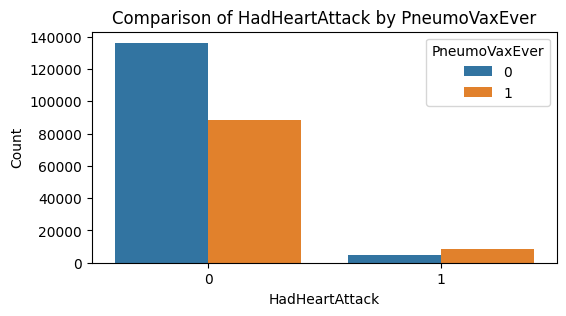

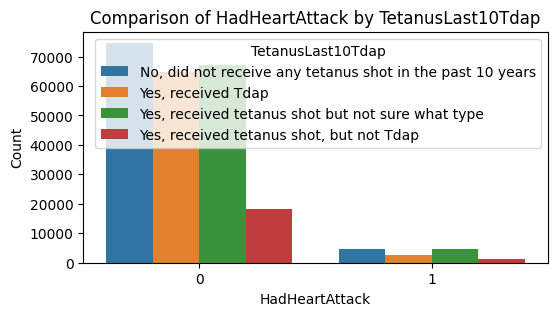

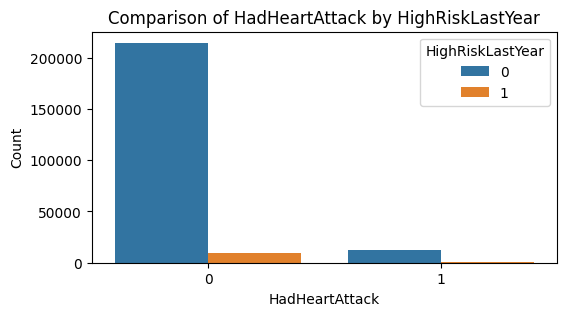

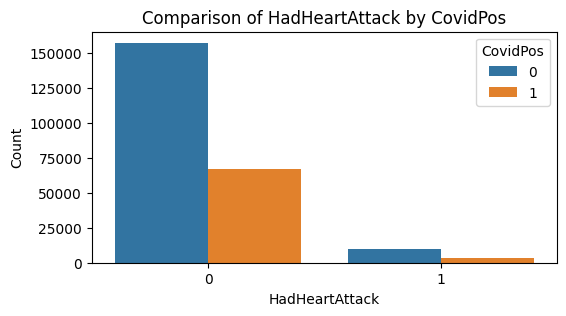

In [17]:
#COMPARISON OF COUNT OF OCCURENCE OF HEART ATTACK BASED ON EACH CATEGORICAL FEATURE USING COLUMN CHART

#categorical_columns_excluding_state = categorical_columns[1:]  # Skip the first column

# Iterate through the modified categorical columns
#for column in categorical_columns_excluding_state:

for i, column in enumerate(categorical_columns_excluding_state):
    plt.figure(figsize=(6, 3))  # Set figure size

    # Create a count plot
    sns.countplot(x='HadHeartAttack', hue=column, data=df)

    # Add title and axis labels
    plt.title(f'Comparison of HadHeartAttack by {column}')
    plt.xlabel('HadHeartAttack')
    plt.ylabel('Count')

    # Add a legend
    plt.legend(title=column)

    # Display the plot
    plt.show()






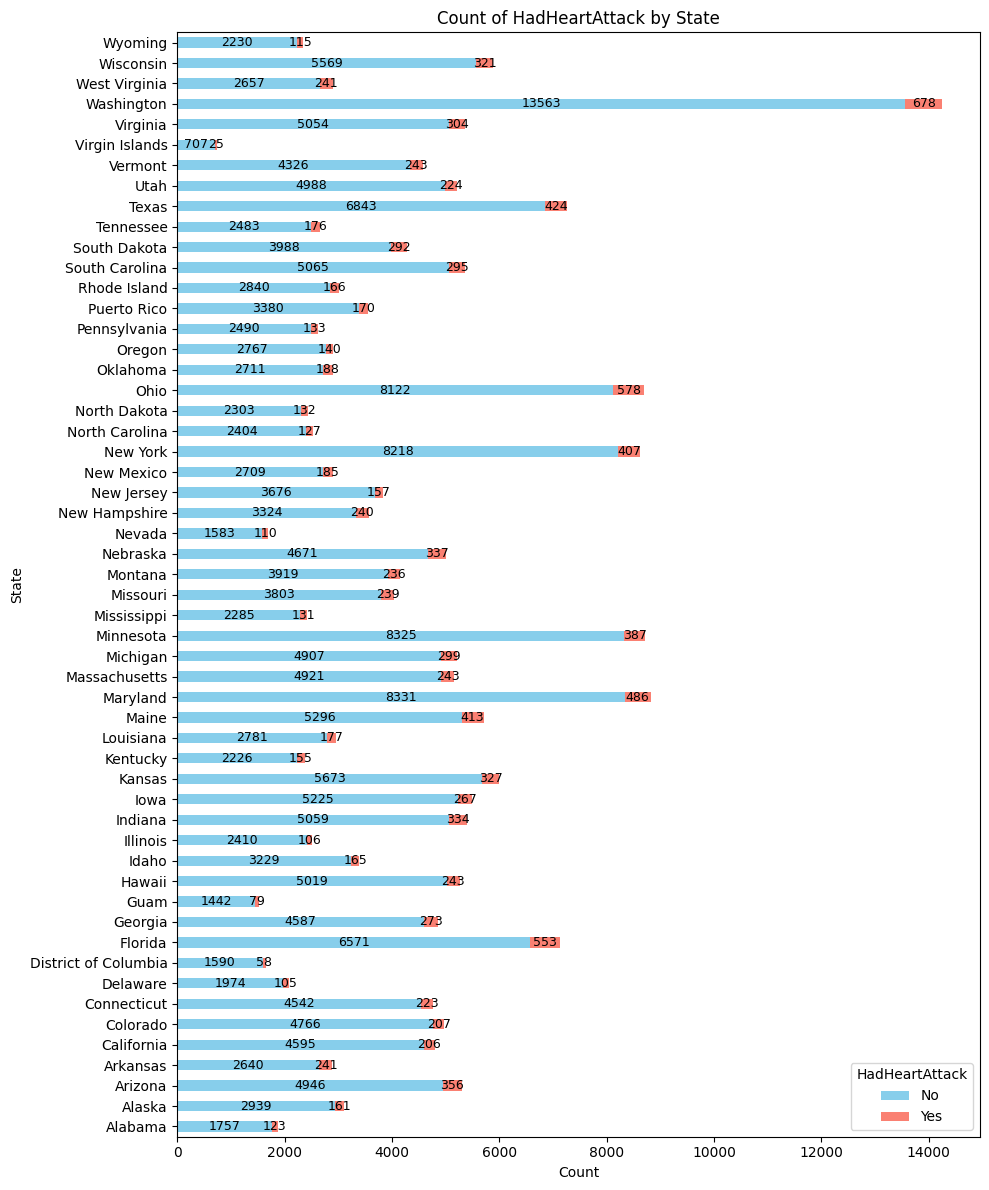

In [18]:
#STATE VISUALIZATION
#COMPARISON OF COUNT OF OCCURENCE OF HEART ATTACK BASED ON EACH STATE USING HORIZONTAL BAR CHART
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'State' and 'HadHeartAttack' to count occurrences
state_heartattack_counts = df.groupby(['State', 'HadHeartAttack']).size().unstack(fill_value=0)

# Plot horizontal bar chart for each state
ax = state_heartattack_counts.plot(kind='barh', stacked=True, figsize=(10, 12), color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Count of HadHeartAttack by State')
plt.legend(title='HadHeartAttack', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout for better fit

# Add counts to each bar
for state_index, (state, row) in enumerate(state_heartattack_counts.iterrows()):
    cumulative_width = 0
    for had_heart_attack, value in enumerate(row):
        if value > 0:  # Only annotate non-zero values
            ax.text(
                cumulative_width + value / 2,  # Position the text at the center of the bar
                state_index,  # Y-coordinate of the state
                str(value),  # The count value to display
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=9,  # Font size
                color='black'  # Text color
            )
            cumulative_width += value

# Show the plot
plt.show()



# VISUALIZATION INSIGHTS SUMMARY

CORRELATION PLOTS
 - HeightInMeters and WeightInKilograms shows a positive correlation.
 - BMI and WeightInKilograms shows a strong positive correlation.


PIE CHARTS:
The data composition shows thus:

 - In the data, female sex are slightly higher than Male with 51.44%.

 - 'Very good' general health condition is the most common at 35.02%.

 - Age category'Age 65 to 69' is the most common category with 11.87%.

 - 82.6% do not have Diabetes

 - 60.11%  have never smoked

 - 77.44%  have never used ECigaretteUsage in their entire life.

 - The distribution shows that 'White only, Non-Hispanic' race are the most common category with 75.26%.

 - 33.61% have not recieved the TetanusLast10Tdap
 tetanus shot in the past 10 years.

HISTOGRAMS AND BOX PLOTS:
The Box plot shows the spread and outliersColumns while the histogram shows the count or frequency
Columns with outliers include BMI, HeightInMeters and WeightInKilograms

BAR CHART
- Heart attack is more frequent in males compared to females
- Majority of the observations in the data are on white hispanic ethnicity.

HORIZONTAL BAR CHART (FOR STATE)
The top 3 states affected are
  - Washington has the highest number of cases with 678

  - Ohio:578 cases

  - Florida: 553 Cases


# PART 2
# DATA PREPARATION


#REMOVING OUTLIERS IN NUMERICAL DATA

In [19]:
import pandas as pd

#
numerical_columns = ['HeightInMeters', 'WeightInKilograms', 'BMI']

# Function to remove outliers using IQR
def remove_outliers(df, numerical_columns):
    for column in numerical_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers in place
        df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

    return df

# Remove outliers from the numerical columns directly on df
df = remove_outliers(df, numerical_columns)




In [20]:
#Drop any null values
df.dropna(inplace=True)
# Print the cleaned DataFrame
print("Shape is", df.shape)
print(df.head())

Shape is (226325, 34)
     State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
0  Alabama  Female          Fair  Age 75 to 79            1.63   
1  Alabama  Female     Very good  Age 65 to 69            1.60   
2  Alabama    Male     Excellent  Age 60 to 64            1.78   
3  Alabama    Male     Very good  Age 70 to 74            1.78   
4  Alabama  Female          Good  Age 50 to 54            1.68   

   WeightInKilograms        BMI  HadHeartAttack  HadAngina  HadStroke  ...  \
0          84.820000  32.099998               0          1          0  ...   
1          71.669998  27.990000               0          0          0  ...   
2          71.209999  22.530001               0          0          0  ...   
3          95.250000  30.129999               0          0          0  ...   
4          78.019997  27.760000               0          0          0  ...   

                             ECigaretteUsage  ChestScan  \
0  Never used e-cigarettes in my entire life         

In [21]:
#Re running statistical analysis
df.describe()

,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,...,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000,226325.000000
mean,1.704527,81.230303,27.860618,0.055164,0.060806,0.041555,0.143095,0.087149,0.075820,0.199090,...,0.138787,0.031212,0.063404,0.423303,0.550443,0.339945,0.533556,0.407445,0.042412,0.292341
std,0.103617,17.916418,5.191637,0.228301,0.238975,0.199571,0.350171,0.282054,0.264711,0.399317,...,0.345725,0.173890,0.243689,0.494084,0.497450,0.473691,0.498874,0.491360,0.201529,0.454839
min,1.420000,30.840000,13.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.630000,68.040001,24.129999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.700000,79.379997,27.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.780000,92.080002,31.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2.000000,135.619995,42.340000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


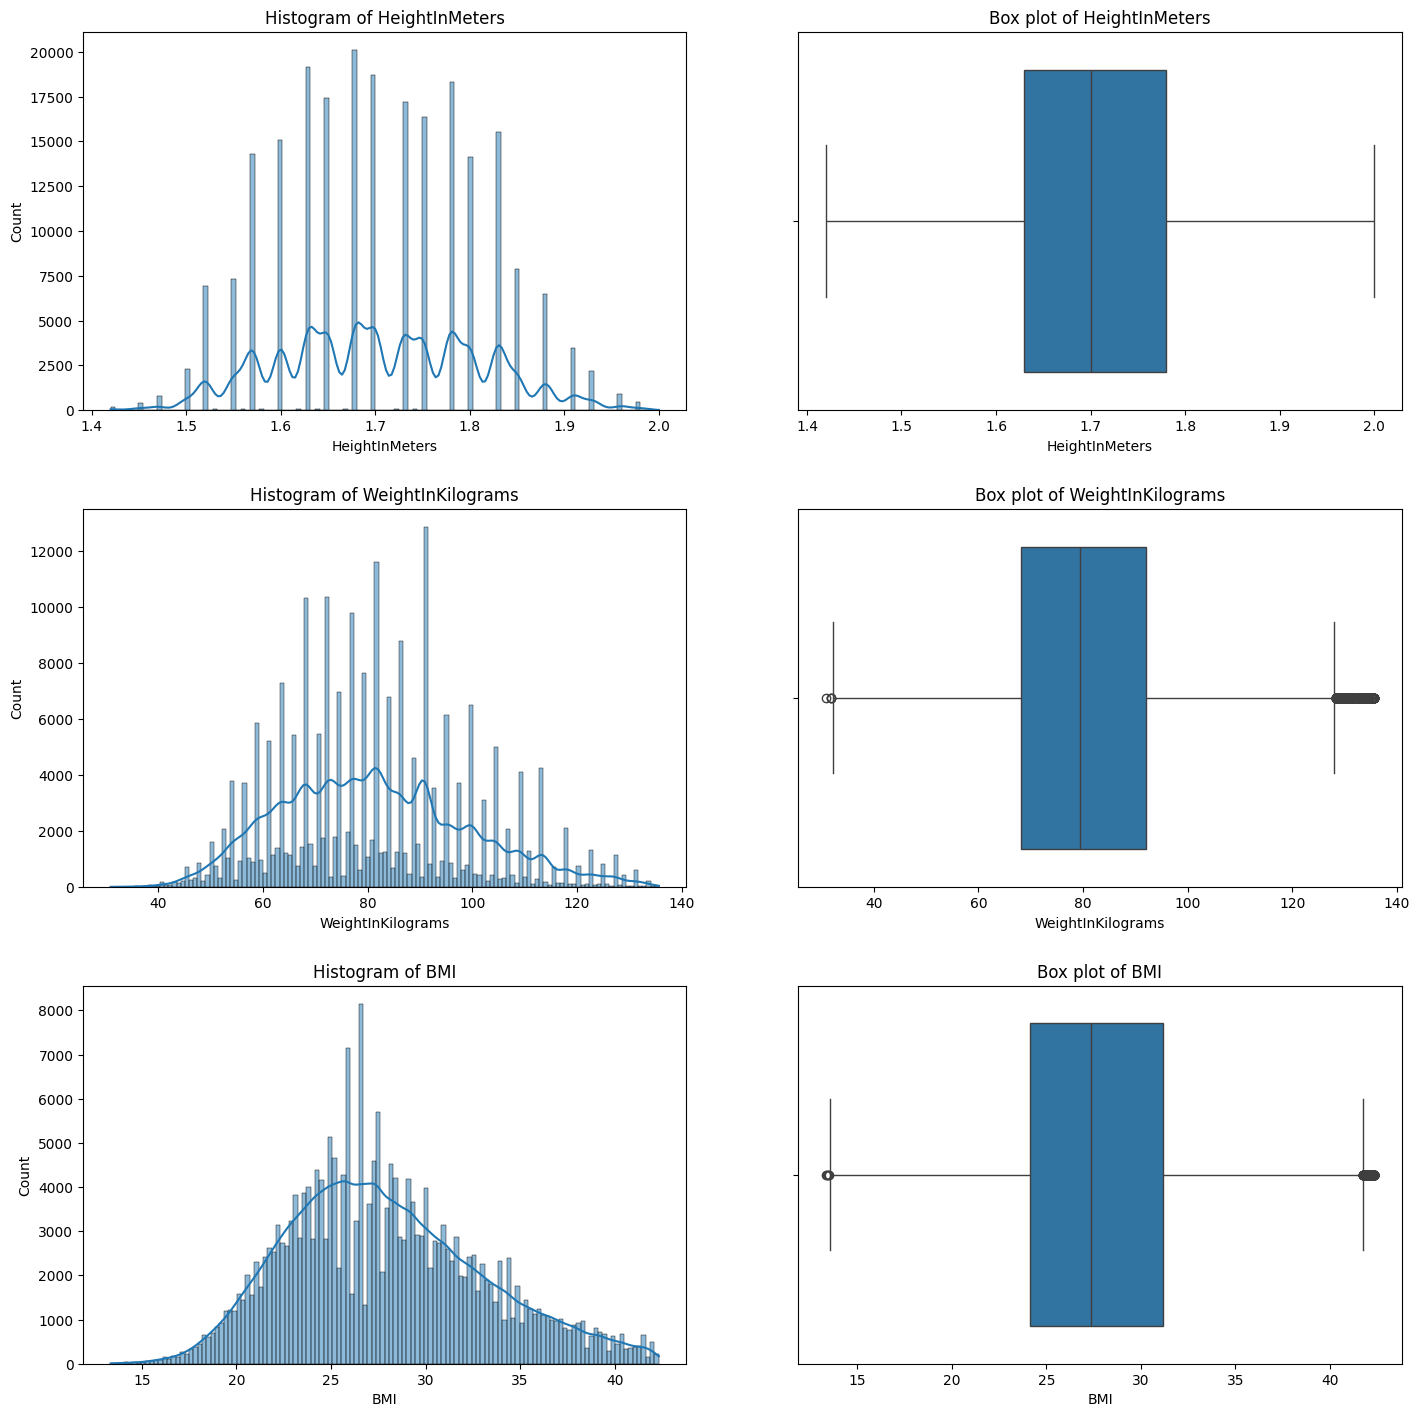

In [22]:
#PLOTTING HISTOGRAM AND BOXPLOT TO UNDERSTAND DISTRIBUTION AND OUTLIERS OF THE NUMERICAL DATA
# Initialize lists for categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Classify columns
for column in df.columns:
    if df[column].dtypes == 'object' or df[column].dtypes == 'bool' or df[column].dtypes == 'int64':
        categorical_columns.append(column)
    elif df[column].dtypes == 'float64':
        numerical_columns.append(column)


fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5 * len(numerical_columns)))

fig.tight_layout(pad=5.0)



for i, column in enumerate(numerical_columns):

    # Histogram

    sns.histplot(df[column], kde=True, ax=axes[i, 0])

    axes[i, 0].set_title(f'Histogram of {column}')



    # Box plot

    sns.boxplot(x=df[column], ax=axes[i, 1])

    axes[i, 1].set_title(f'Box plot of {column}')



plt.show()

In [23]:
# APPLYING NORMALIZATION
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()  # Standardization: Mean = 0, StdDev = 1
scaler = MinMaxScaler()  # Normalization: Values scaled between 0 and 1

# Apply scaling/normalization to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the first few rows to verify
print(df.head())

     State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
0  Alabama  Female          Fair  Age 75 to 79        0.362069   
1  Alabama  Female     Very good  Age 65 to 69        0.310345   
2  Alabama    Male     Excellent  Age 60 to 64        0.620690   
3  Alabama    Male     Very good  Age 70 to 74        0.620690   
4  Alabama  Female          Good  Age 50 to 54        0.448276   

   WeightInKilograms       BMI  HadHeartAttack  HadAngina  HadStroke  ...  \
0           0.515175  0.646896               0          1          0  ...   
1           0.389674  0.505172               0          0          0  ...   
2           0.385283  0.316897               0          0          0  ...   
3           0.614717  0.578965               0          0          0  ...   
4           0.450277  0.497241               0          0          0  ...   

                             ECigaretteUsage  ChestScan  \
0  Never used e-cigarettes in my entire life          1   
1  Never used e-cigare

# DATA TRANSFORMATION
#NORMINAL FEATURE PROCESSING
Our categorical data is normial so we will do One hot encoding and replace 0s and 1s wiith True and False

In [24]:
#REPLACING 0s and 1s
import pandas as pd

# List of categorical columns (including binary features)


# 1. Replace 0 with False and 1 with True for binary categorical columns
binary_columns = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
    'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
    'HighRiskLastYear', 'CovidPos'
]

# Replace 0 with False and 1 with True
df[binary_columns] = df[binary_columns].replace({0: False, 1: True})

df.head()

<ipython-input-24-6a6bc8d60592>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({0: False, 1: True})


,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Fair,Age 75 to 79,0.362069,0.515175,0.646896,False,True,False,...,Never used e-cigarettes in my entire life,True,"White only, Non-Hispanic",False,False,False,True,"No, did not receive any tetanus shot in the pa...",False,True
1,Alabama,Female,Very good,Age 65 to 69,0.310345,0.389674,0.505172,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",False,False,True,True,"Yes, received Tdap",False,False
2,Alabama,Male,Excellent,Age 60 to 64,0.620690,0.385283,0.316897,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",True,False,False,False,"Yes, received tetanus shot but not sure what type",False,False
3,Alabama,Male,Very good,Age 70 to 74,0.620690,0.614717,0.578965,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",False,False,True,True,"Yes, received tetanus shot but not sure what type",False,False
4,Alabama,Female,Good,Age 50 to 54,0.448276,0.450277,0.497241,False,False,False,...,Never used e-cigarettes in my entire life,True,"Black only, Non-Hispanic",False,False,True,False,"No, did not receive any tetanus shot in the pa...",False,False


In [25]:
#PERFORMING LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

# Loop through each categorical column and apply label encoding
label_encoders = {}  # To store the label encoders for future reference

for column in categorical_columns:
    le = LabelEncoder()  # Initialize a label encoder
    df[column] = le.fit_transform(df[column])  # Transform the column
    label_encoders[column] = le  # Save the label encoder for the column

# Display the updated DataFrame
print("Label encoding applied to categorical columns:")
print(df[categorical_columns].head())

# Optionally,  inspect the classes for each column's encoder
for column, le in label_encoders.items():
    print(f"Classes for {column}: {le.classes_}")


Label encoding applied to categorical columns:
   State  Sex  GeneralHealth  AgeCategory  HadHeartAttack  HadAngina  \
0      0    0              1           11               0          1   
1      0    0              4            9               0          0   
2      0    1              0            8               0          0   
3      0    1              4           10               0          0   
4      0    0              2            6               0          0   

   HadStroke  HadAsthma  HadSkinCancer  HadCOPD  ...  ECigaretteUsage  \
0          0          1              1        0  ...                0   
1          0          0              0        0  ...                0   
2          0          0              0        0  ...                0   
3          0          0              0        0  ...                0   
4          0          0              0        0  ...                0   

   ChestScan  RaceEthnicityCategory  AlcoholDrinkers  HIVTesting  \
0          1 

# DROPPING FEATURES
- We can drop E ciggarette usage because it is the same as smokers
- We can drop state as location withing the US is not much of a factor on personal health in the country
_ We can drop similar features

In [26]:
#DROPPING FEATURES
df['HadDiabetes'] = df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes':'Borderline diabetes','Yes, but only during pregnancy (female)':'Pregaency diabetes (Female)'})
df.drop(['State','ECigaretteUsage','BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'ChestScan','HIVTesting', 'FluVaxLast12', 'PneumoVaxEver','CovidPos', 'HadCOPD', 'HadArthritis', 'DeafOrHardOfHearing', 'RaceEthnicityCategory', 'TetanusLast10Tdap'], axis=1, inplace=True)



In [27]:
import pandas as pd

# Randomly sample the number of rows to keep
rows_to_keep = len(df) - 120000

# Ensure rows_to_keep is not negative
if rows_to_keep > 0:
    df = df.sample(n=rows_to_keep, random_state=42).reset_index(drop=True)
else:
    print("The dataset has fewer rows than 120,000. No rows were dropped.")

# Display the updated dataset size
print(f"Updated dataset size: {df.shape}")

Updated dataset size: (106325, 17)


In [28]:
df.head()

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes,SmokerStatus,AlcoholDrinkers,HighRiskLastYear
0,0,2,11,0.448276,0.355030,0.374828,0,0,0,0,0,0,0,0,3,0,0
1,1,4,4,0.568966,0.506490,0.482069,0,0,0,0,0,0,0,0,3,1,0
2,1,2,9,0.620690,0.571483,0.529655,0,0,0,0,0,1,0,0,2,1,0
3,1,2,6,0.793103,0.549819,0.403448,0,0,0,0,0,1,0,0,3,1,1
4,1,2,8,0.655172,0.614717,0.550000,0,0,1,0,1,0,0,0,2,1,0


# PART 3
#MODELLING

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Target column
target_column = 'HadHeartAttack'

# Splitting the dataset
X = df.drop(columns=[target_column])#
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training dataset shape: {X_train.shape}")
print(f"Test dataset shape: {X_test.shape}")



Training dataset shape: (85060, 16)
Test dataset shape: (21265, 16)


In [30]:
# Initialize models
# Import machine learning classifiers
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import PrettyTable for displaying tables
from prettytable import PrettyTable

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "k-NN": KNeighborsClassifier(),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}
# Dictionary to store evaluation metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

# Train, evaluate and compare models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Store metrics
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)
    metrics["ROC-AUC"].append(roc_auc if roc_auc is not None else "N/A")

# Create a table for comparison
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

for i in range(len(metrics["Model"])):
    table.add_row([
        metrics["Model"][i],
        f"{metrics['Accuracy'][i]:.2f}",
        f"{metrics['Precision'][i]:.2f}",
        f"{metrics['Recall'][i]:.2f}",
        f"{metrics['F1-Score'][i]:.2f}",
        metrics['ROC-AUC'][i] if isinstance(metrics['ROC-AUC'][i], str) else f"{metrics['ROC-AUC'][i]:.2f}"
    ])

print(table)



+---------------+----------+-----------+--------+----------+---------+
|     Model     | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
+---------------+----------+-----------+--------+----------+---------+
| Random Forest |   0.94   |    0.52   |  0.25  |   0.34   |   0.84  |
|      SVM      |   0.94   |    0.55   |  0.01  |   0.02   |   0.72  |
|      k-NN     |   0.95   |    0.54   |  0.20  |   0.29   |   0.74  |
|  Extra Trees  |   0.94   |    0.46   |  0.27  |   0.34   |   0.81  |
+---------------+----------+-----------+--------+----------+---------+
